In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import numpy as np

sns.set_theme(style="whitegrid")

results_path = "experiment_results.json"
if os.path.exists(results_path):
    with open(results_path, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    print("Data loaded successfully. First 5 rows:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()
else:
    print(f"Error: {results_path} not found. Please ensure your results file exists.")
    df = pd.DataFrame() 


for col in ['random_mv_sampling_ratio', 'hypergraph_algo_ratio', 'genetic_algo_ratio']:
    df[col] = pd.to_numeric(df[col], errors='coerce') # Coerce errors will turn 'N/A' or inf into NaN

df['log_num_nodes'] = df['num_nodes'].apply(lambda x: pd.NA if x <= 0 else (x if x == 1 else np.log10(x)))
size_order = ["n10", "n100"] 
df['size_category'] = pd.Categorical(df['size_category'], categories=size_order, ordered=True)

Data loaded successfully. First 5 rows:
                      graph_id size_category graph_type  num_nodes  num_edges  \
0       tree_047_binary_00.gml           n10      trees         10          9   
1       tree_057_binary_10.gml           n10      trees         10          9   
2       tree_011_random_11.gml           n10      trees         10          9   
3       tree_001_random_01.gml           n10      trees         10          9   
4  tree_039_caterpillar_07.gml           n10      trees         10          9   

   true_mv_num  random_mv_sampling_size  random_mv_sampling_runtime  \
0          2.0                        2                    0.194477   
1          2.0                        2                    0.188482   
2          3.0                        3                    0.152568   
3          3.0                        3                    0.152854   
4          6.0                        6                    0.094503   

   random_mv_sampling_ratio  hypergraph_algo_s

In [3]:
avg_performance = df.groupby(['graph_type', 'size_category']).agg(
    avg_random_ratio=('random_mv_sampling_ratio', 'mean'),
    avg_hyper_ratio=('hypergraph_algo_ratio', 'mean'),
    avg_genetic_ratio=('genetic_algo_ratio', 'mean'),
    avg_random_runtime=('random_mv_sampling_runtime', 'mean'),
    avg_hyper_runtime=('hypergraph_algo_runtime', 'mean'),
    avg_genetic_runtime=('genetic_algo_runtime', 'mean')
).reset_index()

print("\nAverage Performance by Graph Type and Size:")
print(avg_performance.round(3))


Average Performance by Graph Type and Size:
     graph_type size_category  avg_random_ratio  avg_hyper_ratio  \
0      complete           n10             1.000            1.000   
1      complete          n100               NaN              NaN   
2   erdos_renyi           n10               NaN              NaN   
3   erdos_renyi          n100               NaN              NaN   
4         grids           n10             0.883            0.675   
5         grids          n100               NaN              NaN   
6   mycielskian           n10             0.913            0.889   
7   mycielskian          n100               NaN              NaN   
8      petersen           n10               NaN              NaN   
9      petersen          n100               NaN              NaN   
10        trees           n10             1.000            1.000   
11        trees          n100               NaN              NaN   

    avg_genetic_ratio  avg_random_runtime  avg_hyper_runtime  \
0     

/var/folders/br/n333b5x9347cx8184dwcmj6r0000gn/T/ipykernel_80732/3664652009.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_performance = df.groupby(['graph_type', 'size_category']).agg(


Data loaded successfully. First 5 rows:
                      graph_id size_category graph_type  num_nodes  num_edges  \
0       tree_047_binary_00.gml           n10      trees         10          9   
1       tree_057_binary_10.gml           n10      trees         10          9   
2       tree_011_random_11.gml           n10      trees         10          9   
3       tree_001_random_01.gml           n10      trees         10          9   
4  tree_039_caterpillar_07.gml           n10      trees         10          9   

   true_mv_num  random_mv_sampling_size  random_mv_sampling_runtime  \
0          2.0                        2                    0.194477   
1          2.0                        2                    0.188482   
2          3.0                        3                    0.152568   
3          3.0                        3                    0.152854   
4          6.0                        6                    0.094503   

   random_mv_sampling_ratio  hypergraph_algo_s

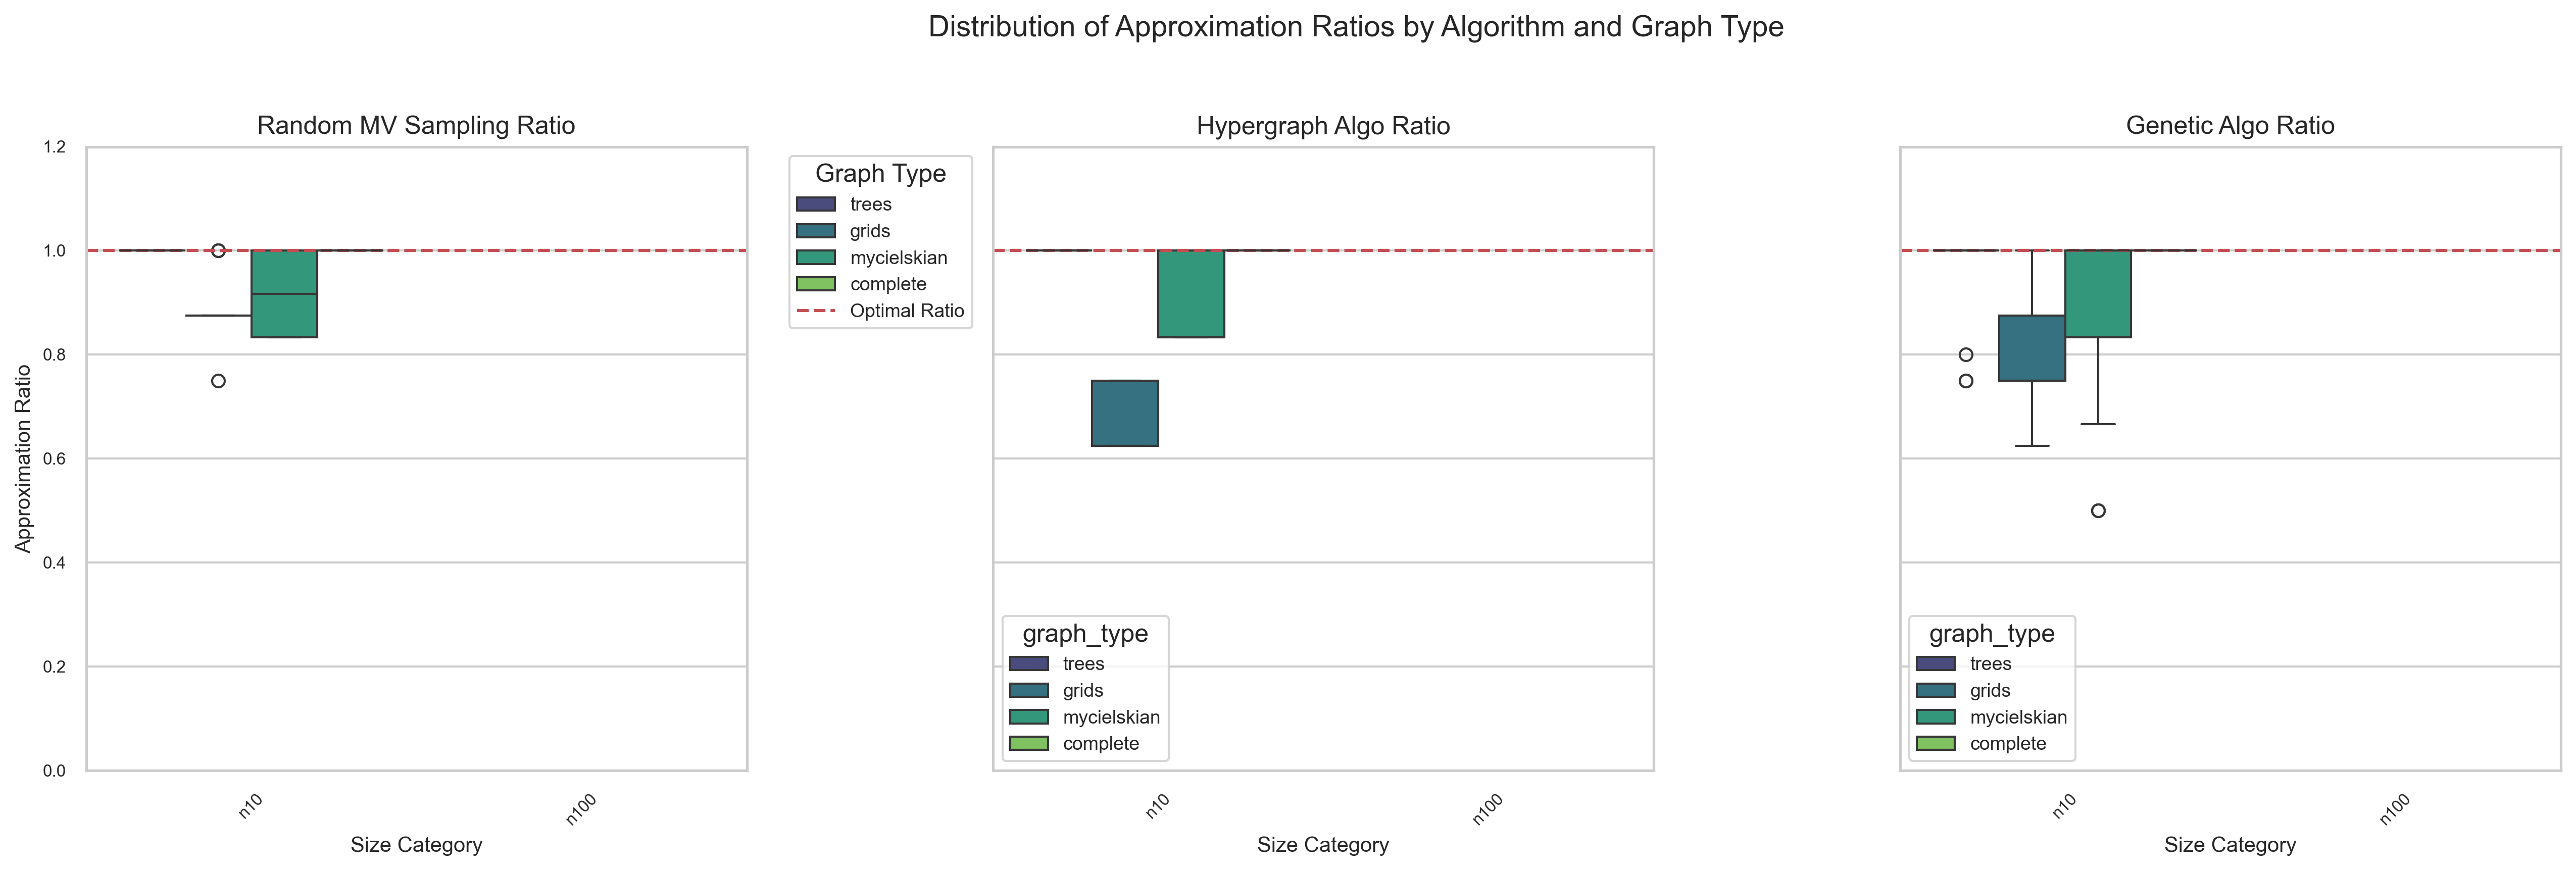

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import numpy as np # Already imported in your previous code

# --- Configuration for plots ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300 # High resolution for figures
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 9

# --- Data Loading and Initial Preparation (assuming this part is already in your script) ---
results_path = "experiment_results.json"
if os.path.exists(results_path):
    with open(results_path, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    print("Data loaded successfully. First 5 rows:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()
else:
    print(f"Error: {results_path} not found. Please ensure your results file exists.")
    df = pd.DataFrame() 

for col in ['random_mv_sampling_ratio', 'hypergraph_algo_ratio', 'genetic_algo_ratio']:
    df[col] = pd.to_numeric(df[col], errors='coerce') 

size_order = ["n10", "n100"] 
df['size_category'] = pd.Categorical(df['size_category'], categories=size_order, ordered=True)

ratio_display_graphs = df[~df['graph_type'].isin(['erdos_renyi', 'petersen'])].copy()

# --- 5.1 Overall Performance Overview (Adjusted Box Plot Code) ---

fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True) # sharey=True makes y-axes identical
fig.suptitle('Distribution of Approximation Ratios by Algorithm and Graph Type', fontsize=14)

# --- Plot 1: Random MV Sampling Ratio ---
sns.boxplot(x='size_category', y='random_mv_sampling_ratio', hue='graph_type', data=ratio_display_graphs, ax=axes[0], palette='viridis')
axes[0].set_title('Random MV Sampling Ratio')
axes[0].set_ylabel('Approximation Ratio')
axes[0].set_xlabel('Size Category') 
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=1.0, color='r', linestyle='--', label='Optimal Ratio', linewidth=1.5) 
axes[0].legend(title='Graph Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Legend here

# --- Plot 2: Hypergraph Algo Ratio ---
sns.boxplot(x='size_category', y='hypergraph_algo_ratio', hue='graph_type', data=ratio_display_graphs, ax=axes[1], palette='viridis')
axes[1].set_title('Hypergraph Algo Ratio')
axes[1].set_ylabel('') # Keep y-label empty due to sharey=True
axes[1].set_xlabel('Size Category') 
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=1.0, color='r', linestyle='--', linewidth=1.5)
# axes[1].legend(title='Graph Type', bbox_to_anchor=(1.05, 1), loc='upper left') # REMOVED LEGEND

# --- Plot 3: Genetic Algo Ratio (with Y-axis limits fix) ---
sns.boxplot(x='size_category', y='genetic_algo_ratio', hue='graph_type', data=ratio_display_graphs, ax=axes[2], palette='viridis')
axes[2].set_title('Genetic Algo Ratio')
axes[2].set_ylabel('') # Keep y-label empty
axes[2].set_xlabel('Size Category') 
axes[2].tick_params(axis='x', rotation=45)
axes[2].axhline(y=1.0, color='r', linestyle='--', linewidth=1.5)
# axes[2].legend(title='Graph Type', bbox_to_anchor=(1.05, 1), loc='upper left') # REMOVED LEGEND

# Apply Y-axis limits for the Genetic Algo plot if it's consistently showing extreme outliers
# Adjust these values based on your actual data's main distribution
# Common range for ratios is [0, 1] (0 is worst, 1 is best). Some algorithms might go >1 if optimal is 0.
axes[2].set_ylim(0.0, 1.2) # Example: Focus on ratios between 0 and 1.2. Adjust as needed.
# You might need to make this dynamic or set it per graph_type or size_category if outliers vary.
# Or apply it to all subplots if all have similar outlier issues.

plt.tight_layout(rect=[0, 0.03, 0.95, 0.95]) 
plt.show()

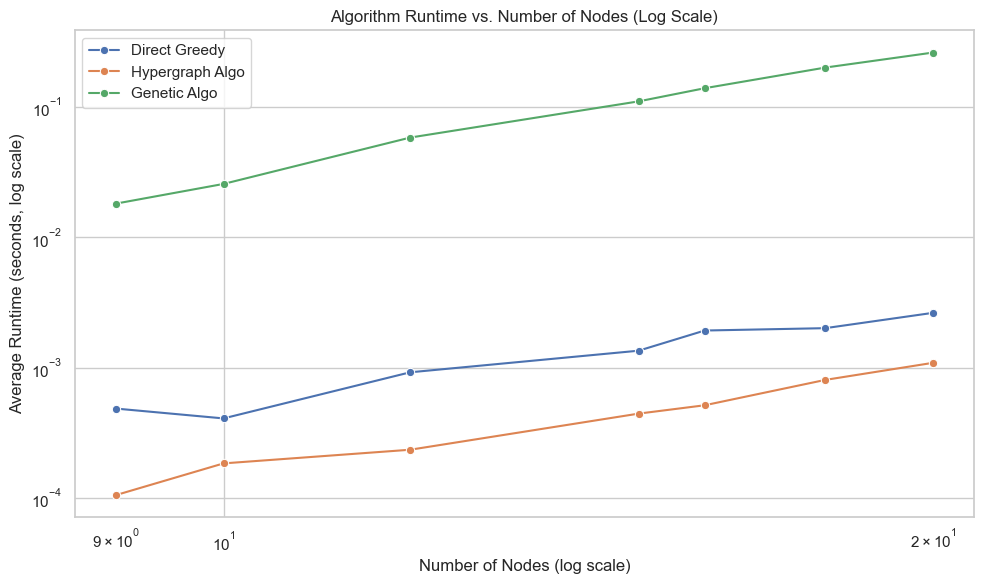

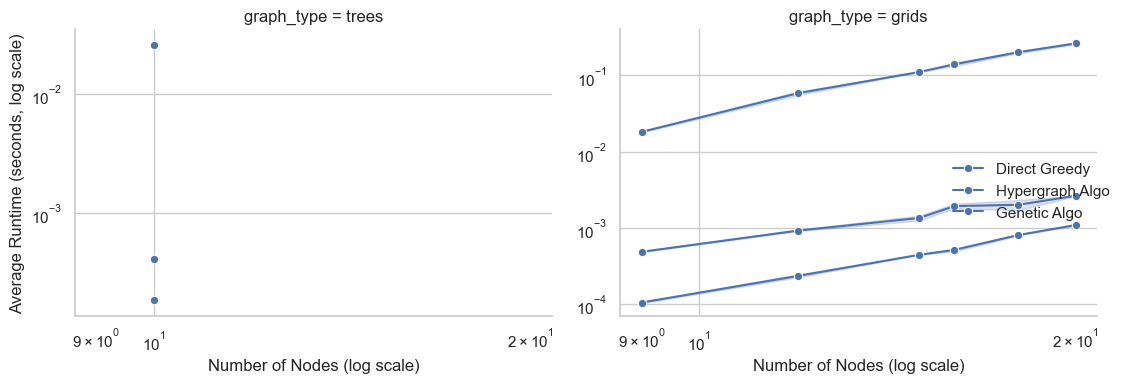

In [ ]:
gi

Data loaded successfully. First 5 rows:
                      graph_id size_category graph_type  num_nodes  num_edges  \
0       tree_047_binary_00.gml           n10      trees         10          9   
1       tree_057_binary_10.gml           n10      trees         10          9   
2       tree_011_random_11.gml           n10      trees         10          9   
3       tree_001_random_01.gml           n10      trees         10          9   
4  tree_039_caterpillar_07.gml           n10      trees         10          9   

   true_mv_num  random_mv_sampling_size  random_mv_sampling_runtime  \
0          2.0                        2                    0.194477   
1          2.0                        2                    0.188482   
2          3.0                        3                    0.152568   
3          3.0                        3                    0.152854   
4          6.0                        6                    0.094503   

   random_mv_sampling_ratio  hypergraph_algo_s

/var/folders/br/n333b5x9347cx8184dwcmj6r0000gn/T/ipykernel_80732/3485450936.py:45: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_performance = df.groupby(['graph_type', 'size_category']).agg(


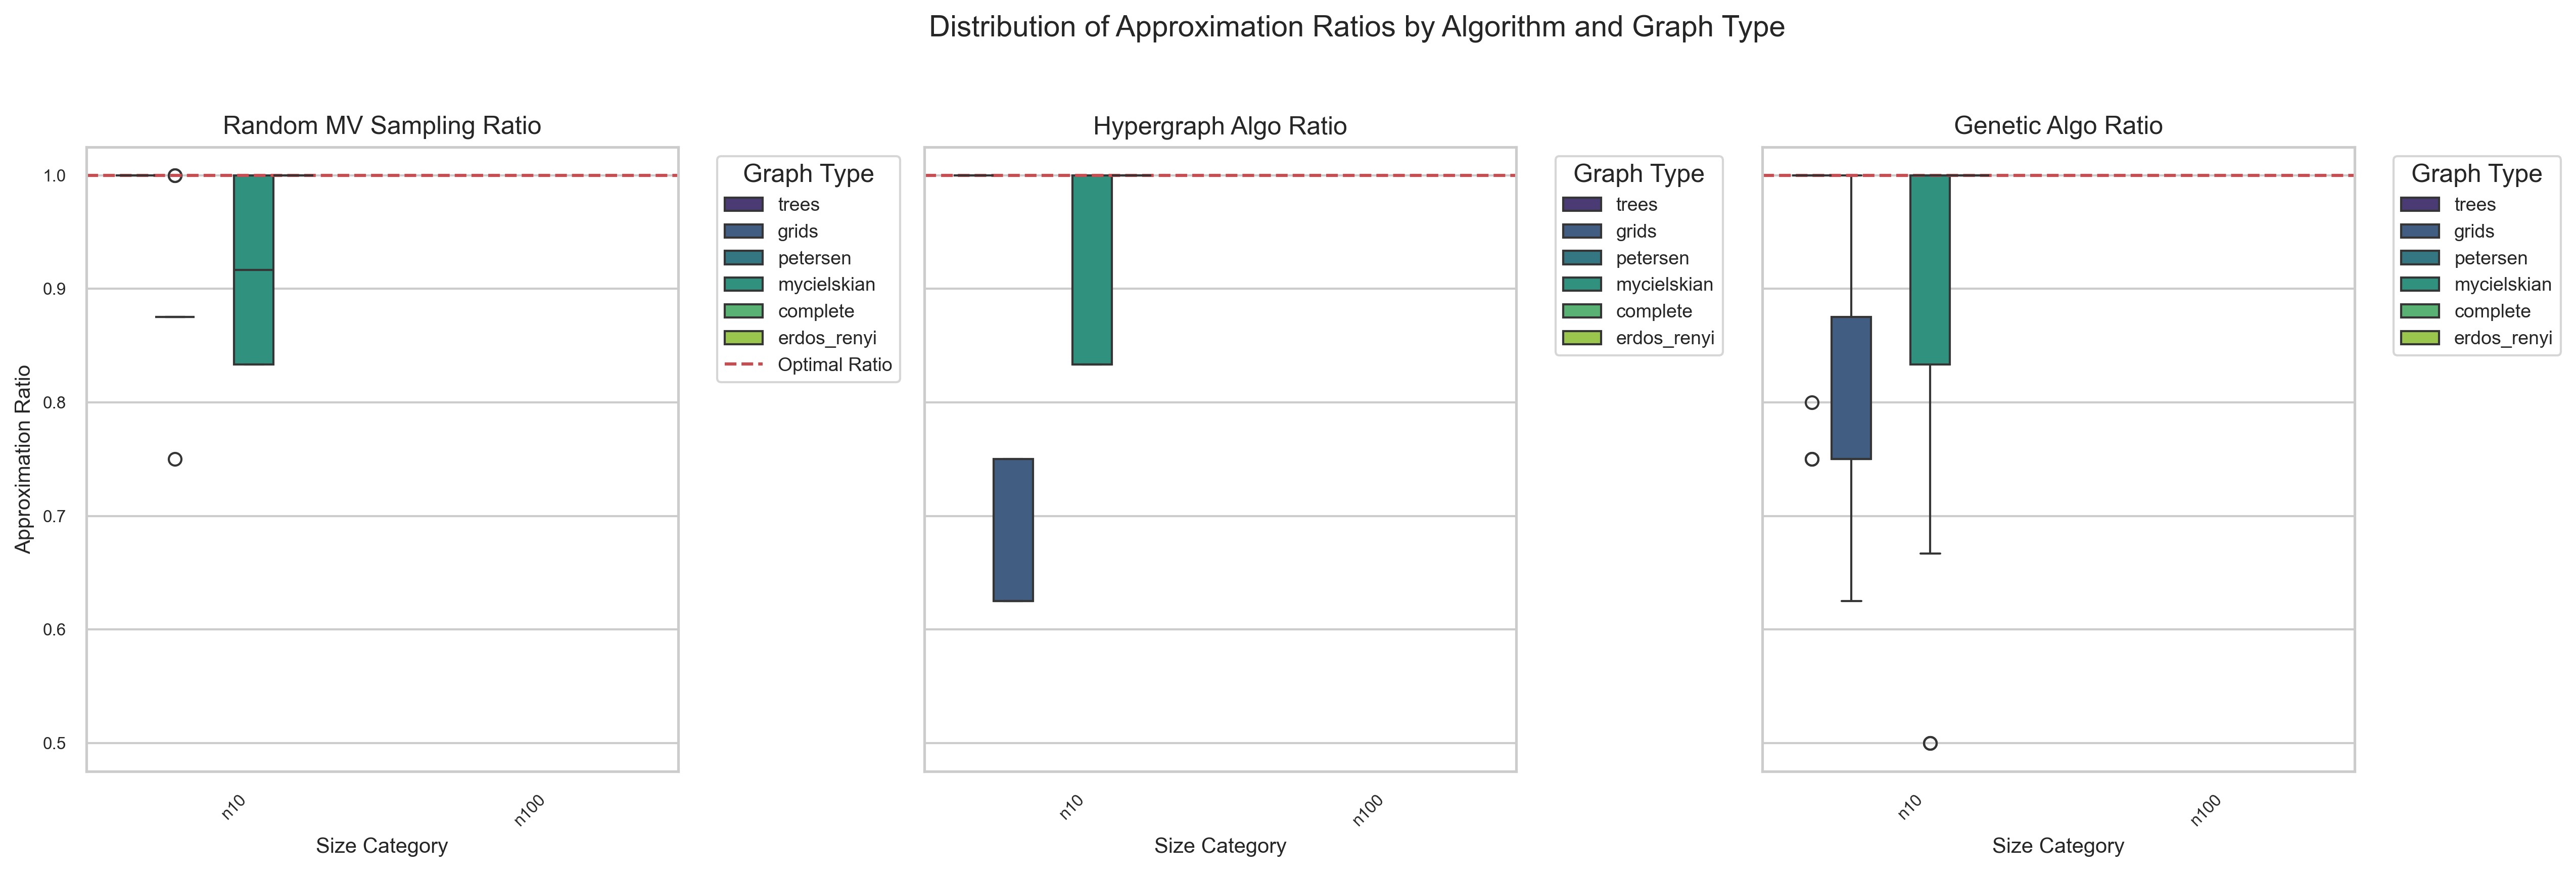

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import numpy as np

# --- Configuration for plots ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300 # High resolution for figures
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 9

# --- Data Loading and Initial Preparation ---
results_path = "experiment_results.json"
if os.path.exists(results_path):
    with open(results_path, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    print("Data loaded successfully. First 5 rows:")
    print(df.head())
    print("\nDataFrame Info:")
    df.info()
else:
    print(f"Error: {results_path} not found. Please ensure your results file exists.")
    df = pd.DataFrame() 

# Ensure ratios are numeric and handle potential NaNs
# 'coerce' will turn non-numeric values (like None from JSON) into NaN
for col in ['random_mv_sampling_ratio', 'hypergraph_algo_ratio', 'genetic_algo_ratio']:
    df[col] = pd.to_numeric(df[col], errors='coerce') 

# For plots: Create an ordered categorical type for 'size_category'
size_order = ["n10", "n100"] 
df['size_category'] = pd.Categorical(df['size_category'], categories=size_order, ordered=True)

# --- 5.1 Overall Performance Overview ---

# Calculate Average Performance by Graph Type and Size Category
avg_performance = df.groupby(['graph_type', 'size_category']).agg(
    avg_random_ratio=('random_mv_sampling_ratio', 'mean'),
    avg_hyper_ratio=('hypergraph_algo_ratio', 'mean'),
    avg_genetic_ratio=('genetic_algo_ratio', 'mean'),
    avg_random_runtime=('random_mv_sampling_runtime', 'mean'),
    avg_hyper_runtime=('hypergraph_algo_runtime', 'mean'),
    avg_genetic_runtime=('genetic_algo_runtime', 'mean')
).reset_index()

print("\nAverage Performance by Graph Type and Size Category:")
print(avg_performance.round(3))

# Visualize Distribution of Approximation Ratios (Box Plots)
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True) # sharey=True makes y-axes identical

# Set overall title
fig.suptitle('Distribution of Approximation Ratios by Algorithm and Graph Type', fontsize=14)

# --- Plot 1: Random MV Sampling Ratio ---
sns.boxplot(x='size_category', y='random_mv_sampling_ratio', hue='graph_type', data=df, ax=axes[0], palette='viridis')
axes[0].set_title('Random MV Sampling Ratio')
axes[0].set_ylabel('Approximation Ratio')
axes[0].set_xlabel('Size Category')
axes[0].tick_params(axis='x', rotation=45)
axes[0].axhline(y=1.0, color='r', linestyle='--', label='Optimal Ratio', linewidth=1.5) # Optimal line
axes[0].legend(title='Graph Type', bbox_to_anchor=(1.05, 1), loc='upper left') # Place legend outside

# --- Plot 2: Hypergraph Algo Ratio ---
sns.boxplot(x='size_category', y='hypergraph_algo_ratio', hue='graph_type', data=df, ax=axes[1], palette='viridis')
axes[1].set_title('Hypergraph Algo Ratio')
axes[1].set_ylabel('') # Keep y-label empty due to sharey=True
axes[1].set_xlabel('Size Category')
axes[1].tick_params(axis='x', rotation=45)
axes[1].axhline(y=1.0, color='r', linestyle='--', linewidth=1.5)
axes[1].legend(title='Graph Type', bbox_to_anchor=(1.05, 1), loc='upper left')

# --- Plot 3: Genetic Algo Ratio ---
sns.boxplot(x='size_category', y='genetic_algo_ratio', hue='graph_type', data=df, ax=axes[2], palette='viridis')
axes[2].set_title('Genetic Algo Ratio')
axes[2].set_ylabel('') # Keep y-label empty
axes[2].set_xlabel('Size Category')
axes[2].tick_params(axis='x', rotation=45)
axes[2].axhline(y=1.0, color='r', linestyle='--', linewidth=1.5)
axes[2].legend(title='Graph Type', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout(rect=[0, 0.03, 0.95, 0.95]) # Adjust rect to make space for legends
plt.show()

<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\m'
<>:34: SyntaxWarning: invalid escape sequence '\m'
<>:41: SyntaxWarning: invalid escape sequence '\m'
<>:48: SyntaxWarning: invalid escape sequence '\m'
/var/folders/br/n333b5x9347cx8184dwcmj6r0000gn/T/ipykernel_80732/3598237634.py:34: SyntaxWarning: invalid escape sequence '\m'
  axes[0].set_xlabel('True MV Number ($\mu(G)$)')
/var/folders/br/n333b5x9347cx8184dwcmj6r0000gn/T/ipykernel_80732/3598237634.py:41: SyntaxWarning: invalid escape sequence '\m'
  axes[1].set_xlabel('True MV Number ($\mu(G)$)')
/var/folders/br/n333b5x9347cx8184dwcmj6r0000gn/T/ipykernel_80732/3598237634.py:48: SyntaxWarning: invalid escape sequence '\m'
  axes[2].set_xlabel('True MV Number ($\mu(G)$)')


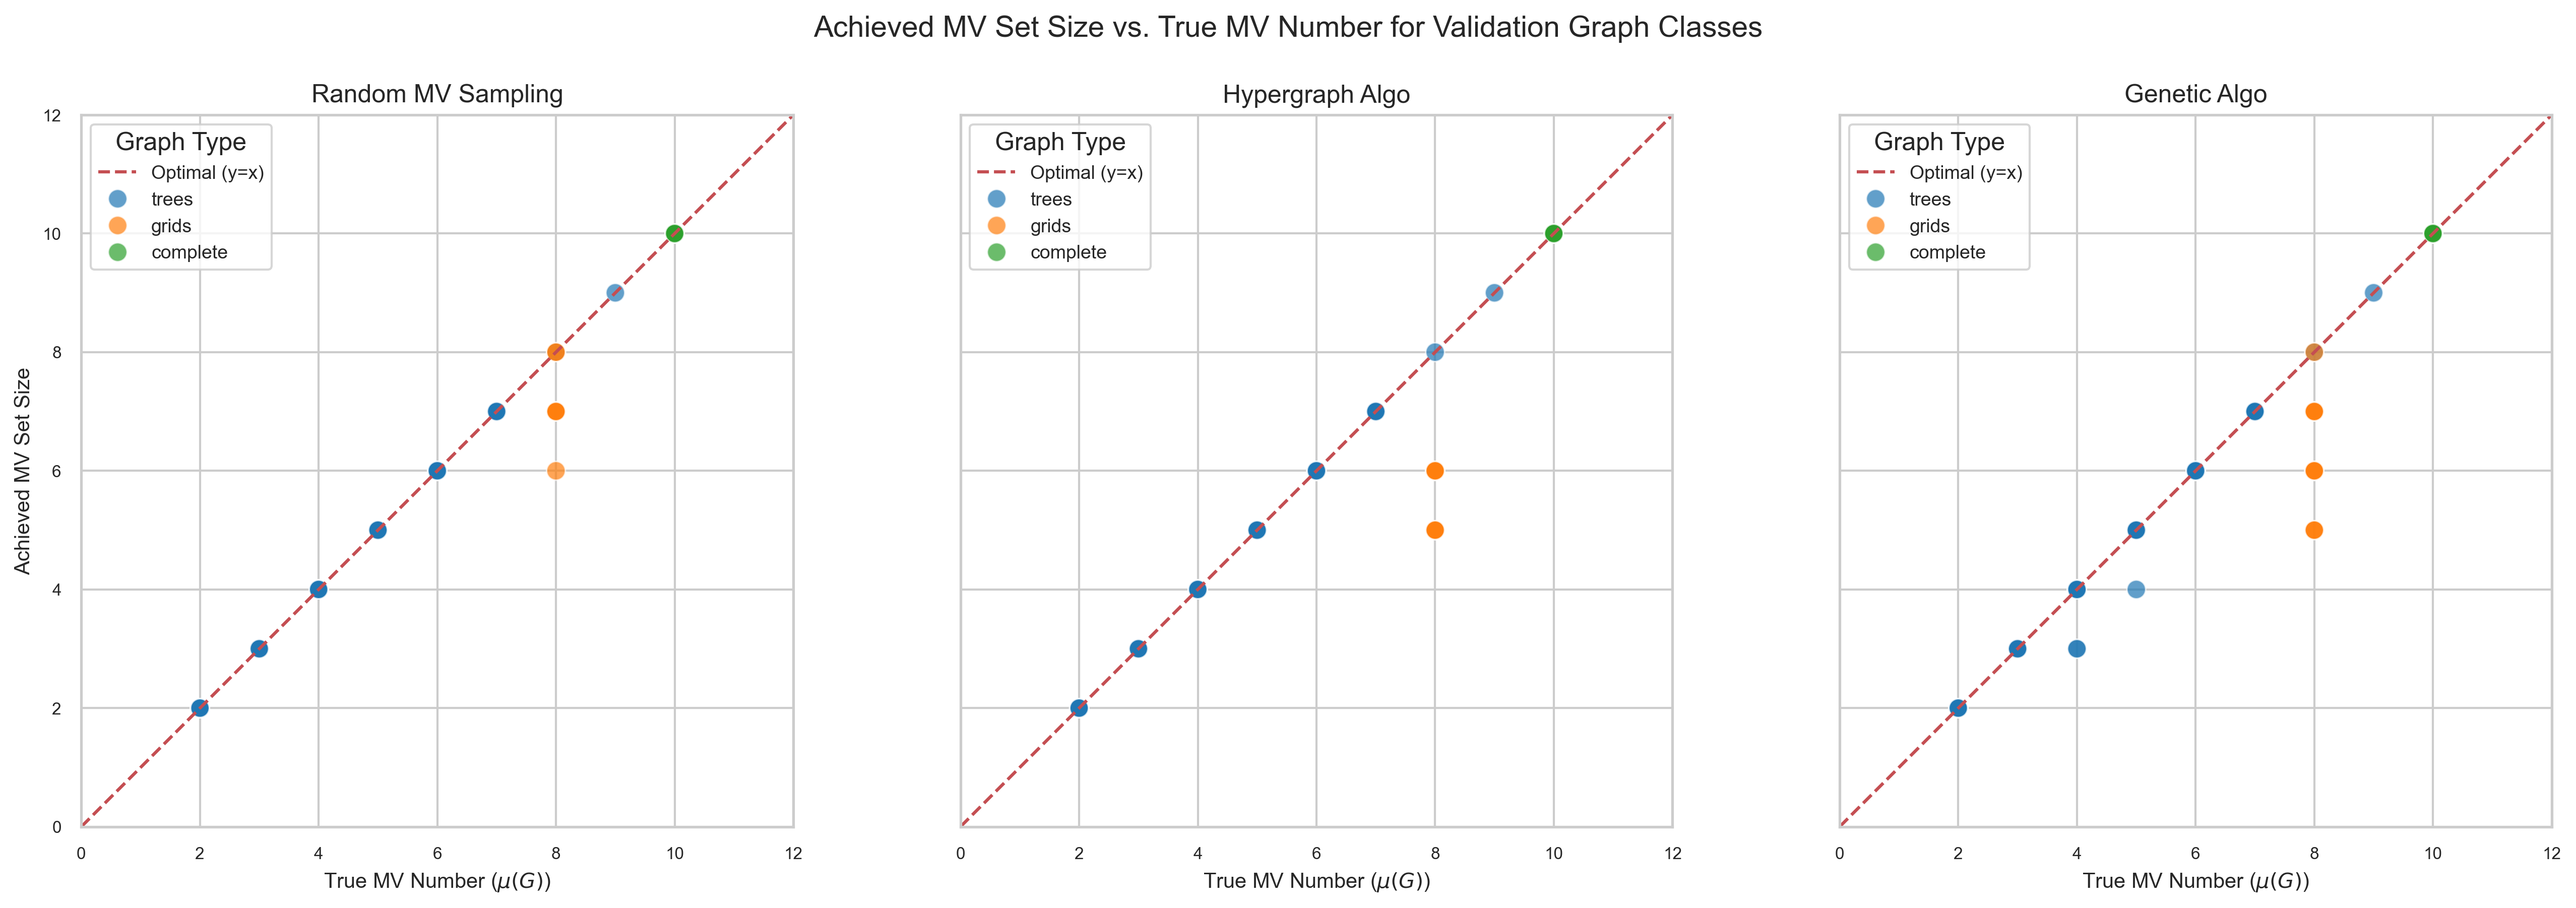

In [15]:
# Assuming df is your loaded and preprocessed DataFrame

# Filter for Category 1 graphs where true_mv_num is definitively known
# (You might need to refine this filter if 'true_mv_num' is None for some n100/n1000 instances
# even for these classes, due to computational skips in generation.)
category1_graphs = df[df['graph_type'].isin(['complete', 'trees', 'grids', 
                                              'mycialeskian'])] # Assuming these are included and filled in the generation

# Filter out rows where true_mv_num is NaN or 0 (if 0, ratio is 1.0 handled, but usually not interest)
category1_graphs_valid_mu = category1_graphs[
    category1_graphs['true_mv_num'].notna() & (category1_graphs['true_mv_num'] > 0)
].copy() # Use .copy() to avoid SettingWithCopyWarning

if not category1_graphs_valid_mu.empty:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharex=True, sharey=True)
    fig.suptitle('Achieved MV Set Size vs. True MV Number for Validation Graph Classes', fontsize=14)

    max_mu = category1_graphs_valid_mu['true_mv_num'].max()
    if pd.isna(max_mu): # Handle case where all are NaN after filtering
        max_mu = 1 # Fallback to avoid error on empty range
    else:
        max_mu = int(max_mu * 1.1) + 1 # Extend axis slightly

    # Plot optimal line
    for ax in axes:
        ax.plot([0, max_mu], [0, max_mu], 'r--', label='Optimal (y=x)')
        ax.set_aspect('equal', adjustable='box') # Keep aspect ratio square
        ax.set_xlim(0, max_mu)
        ax.set_ylim(0, max_mu)

    # Random MV Sampling
    sns.scatterplot(x='true_mv_num', y='random_mv_sampling_size', hue='graph_type', data=category1_graphs_valid_mu, ax=axes[0], palette='tab10', s=80, alpha=0.7)
    axes[0].set_title('Random MV Sampling')
    axes[0].set_xlabel('True MV Number ($\mu(G)$)')
    axes[0].set_ylabel('Achieved MV Set Size')
    axes[0].legend(title='Graph Type')

    # Hypergraph Algo
    sns.scatterplot(x='true_mv_num', y='hypergraph_algo_size', hue='graph_type', data=category1_graphs_valid_mu, ax=axes[1], palette='tab10', s=80, alpha=0.7)
    axes[1].set_title('Hypergraph Algo')
    axes[1].set_xlabel('True MV Number ($\mu(G)$)')
    axes[1].set_ylabel('') # Shared Y-axis
    axes[1].legend(title='Graph Type')

    # Genetic Algo
    sns.scatterplot(x='true_mv_num', y='genetic_algo_size', hue='graph_type', data=category1_graphs_valid_mu, ax=axes[2], palette='tab10', s=80, alpha=0.7)
    axes[2].set_title('Genetic Algo')
    axes[2].set_xlabel('True MV Number ($\mu(G)$)')
    axes[2].set_ylabel('') # Shared Y-axis
    axes[2].legend(title='Graph Type')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()
else:
    print("\nSkipping 'Achieved MV Set Size vs. True MV Number' plot: No valid data for Category 1 graphs.")

<>:24: SyntaxWarning: invalid escape sequence '\O'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:24: SyntaxWarning: invalid escape sequence '\O'
<>:25: SyntaxWarning: invalid escape sequence '\s'
/var/folders/br/n333b5x9347cx8184dwcmj6r0000gn/T/ipykernel_80732/3874613860.py:24: SyntaxWarning: invalid escape sequence '\O'
  plt.title('Hypergraph Algo Size vs. Theoretical Lower Bound ($\Omega(\sqrt{n/\overline{D}})$)', fontsize=14)
/var/folders/br/n333b5x9347cx8184dwcmj6r0000gn/T/ipykernel_80732/3874613860.py:25: SyntaxWarning: invalid escape sequence '\s'
  plt.xlabel('Theoretical Lower Bound ($\sqrt{n/\overline{D}}$)')


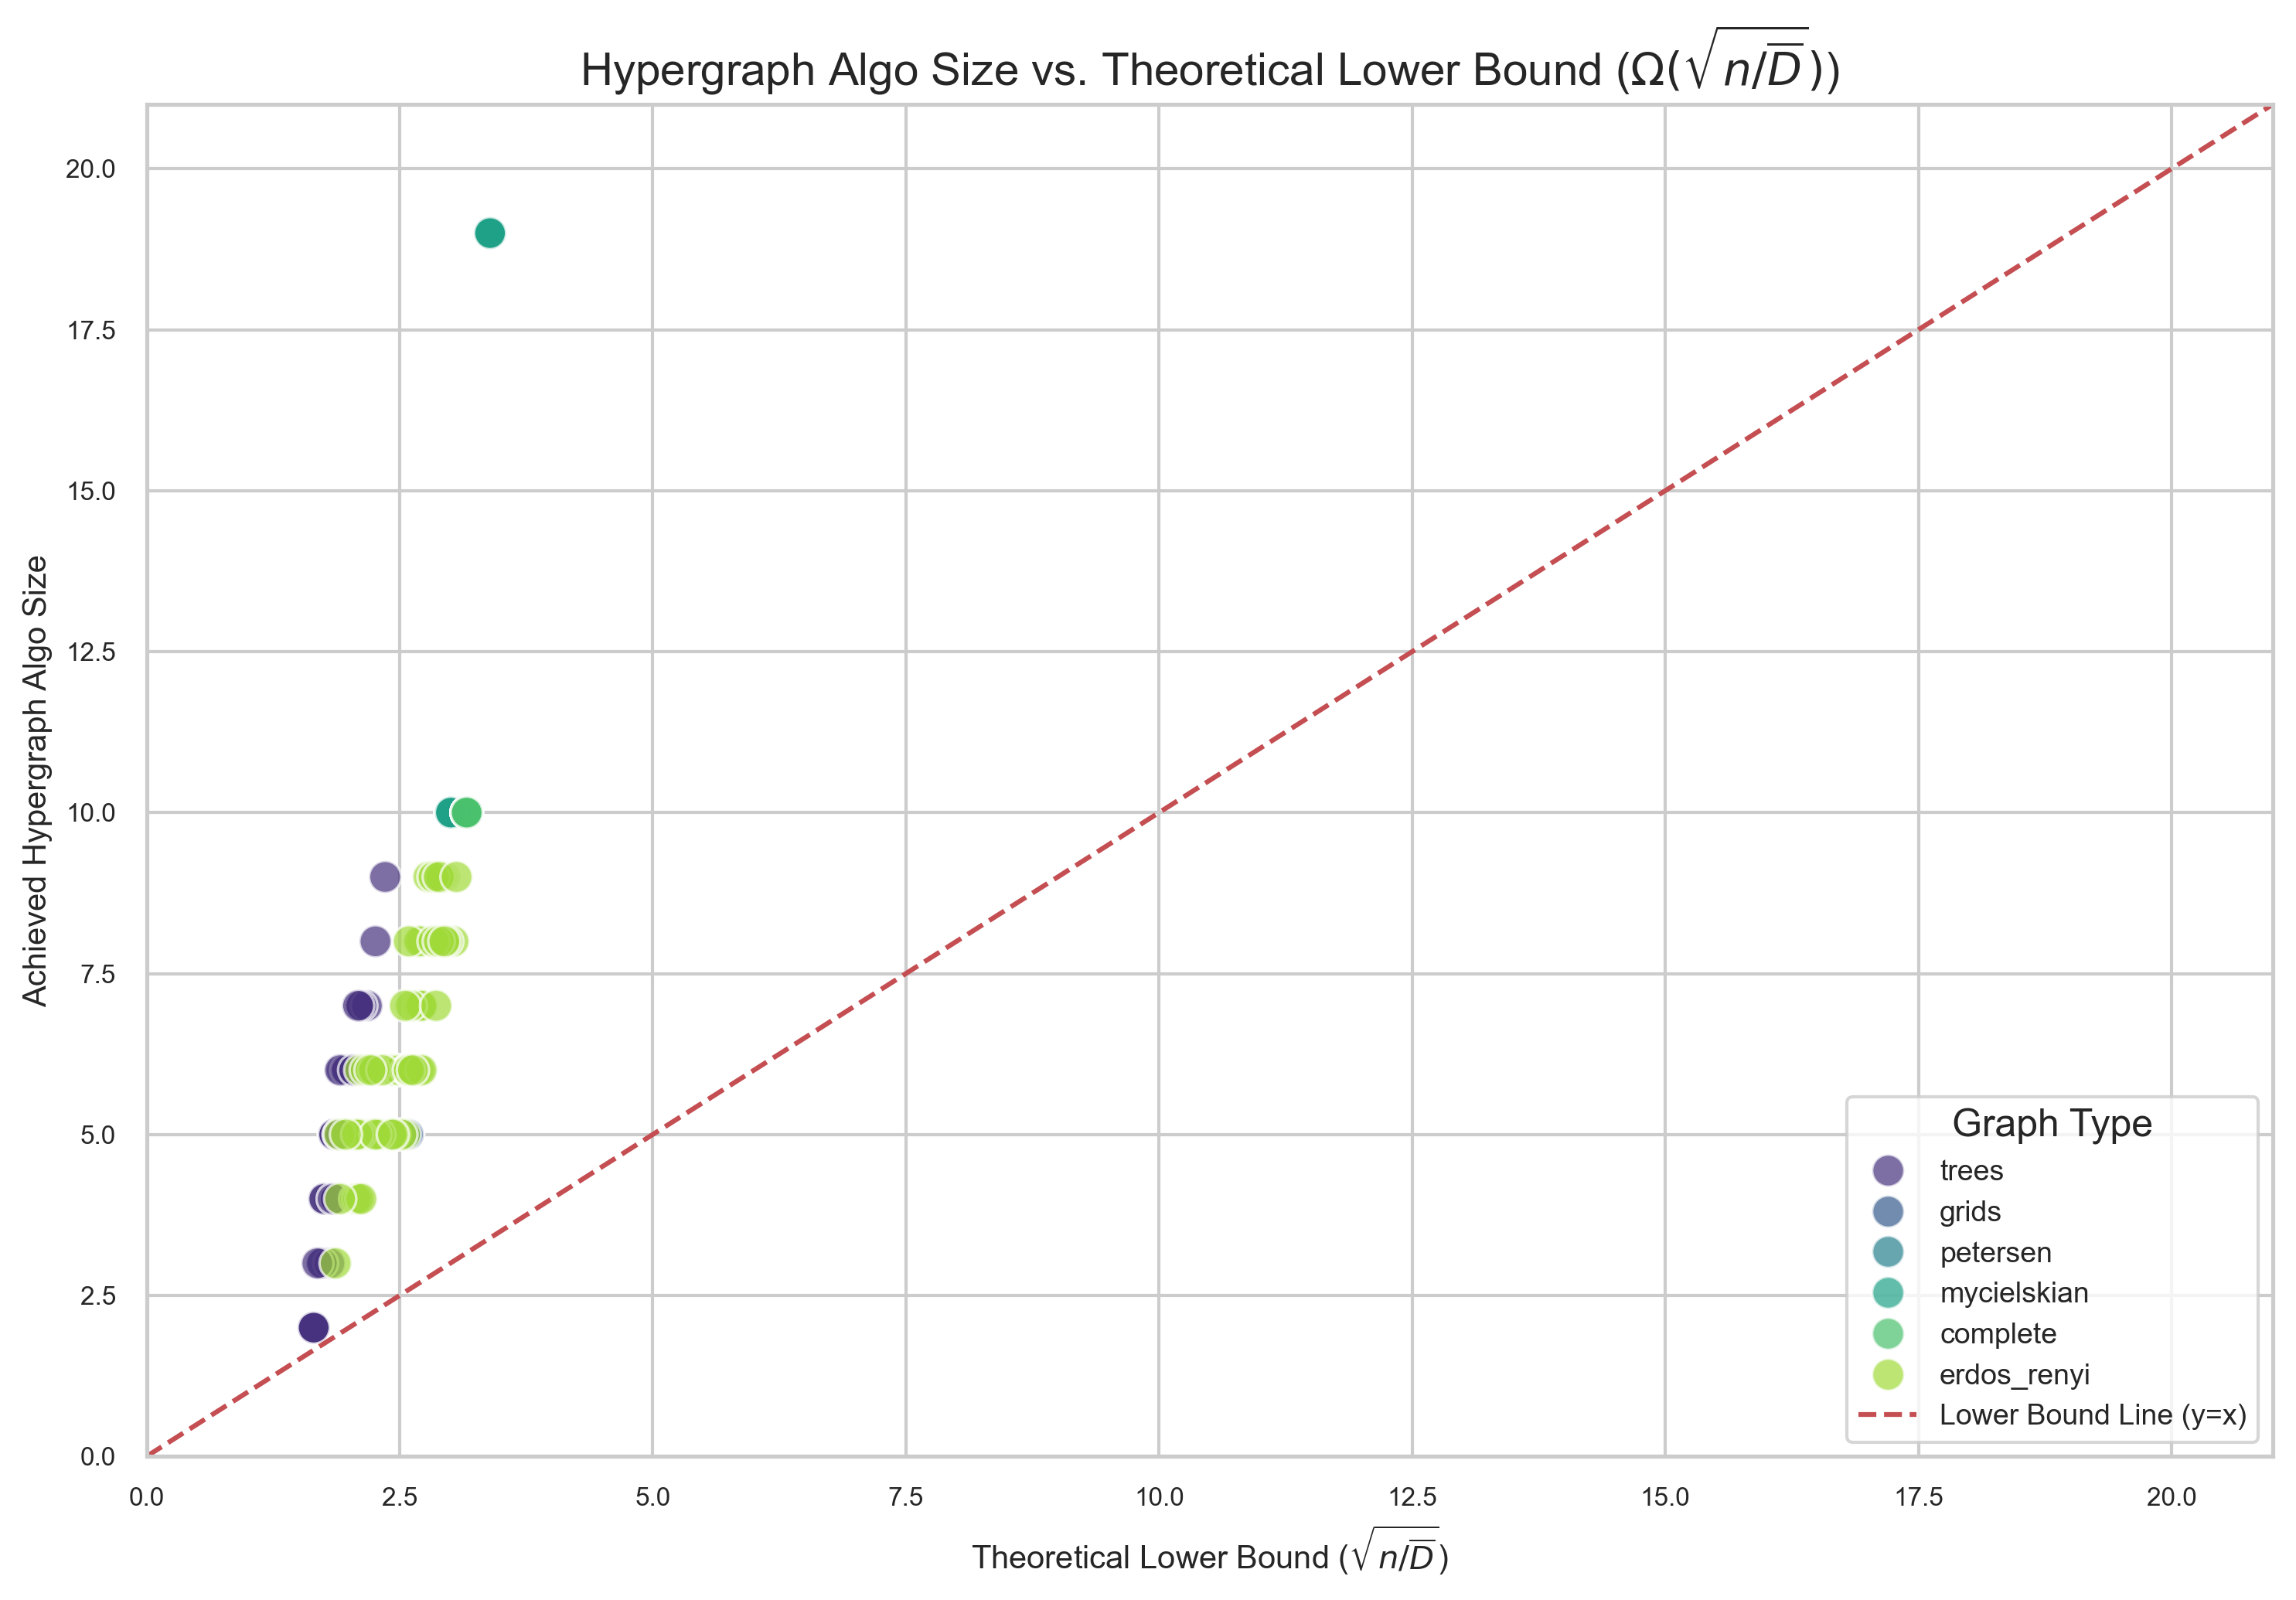

In [16]:
# Filter for graphs where hypergraph_omega_sqrt_n_D_lower_bound is available and positive
# This includes ER, Mycielskian, Complete, Grids, Trees (where calculated)
relevant_hypergraph_bounds = df[
    df['hypergraph_omega_sqrt_n_D_lower_bound'].notna() & 
    (df['hypergraph_omega_sqrt_n_D_lower_bound'] > 0)
].copy()

if not relevant_hypergraph_bounds.empty:
    plt.figure(figsize=(10, 7))
    sns.scatterplot(x='hypergraph_omega_sqrt_n_D_lower_bound', y='hypergraph_algo_size',
                    hue='graph_type', data=relevant_hypergraph_bounds, palette='viridis', s=100, alpha=0.7)

    # Plot y=x line for ideal case where achieved size matches the lower bound
    max_val = max(relevant_hypergraph_bounds['hypergraph_omega_sqrt_n_D_lower_bound'].max(), 
                  relevant_hypergraph_bounds['hypergraph_algo_size'].max())
    
    if pd.isna(max_val):
        max_val = 1
    else:
        max_val = int(max_val * 1.1) + 1

    plt.plot([0, max_val], [0, max_val], 'r--', label='Lower Bound Line (y=x)', linewidth=1.5)

    plt.title('Hypergraph Algo Size vs. Theoretical Lower Bound ($\Omega(\sqrt{n/\overline{D}})$)', fontsize=14)
    plt.xlabel('Theoretical Lower Bound ($\sqrt{n/\overline{D}}$)')
    plt.ylabel('Achieved Hypergraph Algo Size')
    plt.xlim(0, max_val)
    plt.ylim(0, max_val)
    plt.legend(title='Graph Type')
    plt.tight_layout()
    plt.show()
else:
    print("\nSkipping 'Hypergraph Lower Bound Verification' plot: No valid data for hypergraph Omega bound.")


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import numpy as np 

# --- Data Loading and Initial Preparation ---
# Assuming this part is already correct and loads your df DataFrame
results_path = "experiment_results.json"
if os.path.exists(results_path):
    with open(results_path, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    
    # Ensure ratios are numeric and handle potential NaNs
    for col in ['random_mv_sampling_ratio', 'hypergraph_algo_ratio', 'genetic_algo_ratio']:
        df[col] = pd.to_numeric(df[col], errors='coerce') 

    # For plots: Create an ordered categorical type for 'size_category'
    # Assuming 'n10', 'n100', 'n1000' are the only categories or you'll filter later
    size_order = ["n10", "n100"] 
    df['size_category'] = pd.Categorical(df['size_category'], categories=size_order, ordered=True)

else:
    print(f"Error: {results_path} not found. Please ensure your results file exists.")
    df = pd.DataFrame() 

# --- Calculation of Average Performance by Graph Type and Size Category ---

# Filter out graph types for which ratios are N/A (as discussed, e.g., Erdos-Renyi, Petersen)
# This ensures average ratios are only computed for valid data.
# Adjust this filter if you want to include other graphs or properties.
ratio_calculable_graphs = df[~df['graph_type'].isin(['erdos_renyi', 'petersen'])].copy()

# Group by graph_type and size_category and calculate means
avg_performance = ratio_calculable_graphs.groupby(['graph_type', 'size_category']).agg(
    avg_random_ratio=('random_mv_sampling_ratio', 'mean'),
    avg_hyper_ratio=('hypergraph_algo_ratio', 'mean'),
    avg_genetic_ratio=('genetic_algo_ratio', 'mean'),
    avg_random_runtime=('random_mv_sampling_runtime', 'mean'),
    avg_hyper_runtime=('hypergraph_algo_runtime', 'mean'),
    avg_genetic_runtime=('genetic_algo_runtime', 'mean')
).reset_index()

# Sort for consistent display in the table
avg_performance = avg_performance.sort_values(by=['graph_type', 'size_category'])

# Print the table, formatted to 3 decimal places for readability
print("\nAverage Performance by Graph Type and Size Category:")
print(avg_performance.round(3).to_string()) # .to_string() prevents truncation for wide tables


Average Performance by Graph Type and Size Category:
    graph_type size_category  avg_random_ratio  avg_hyper_ratio  avg_genetic_ratio  avg_random_runtime  avg_hyper_runtime  avg_genetic_runtime
0     complete           n10             1.000            1.000              1.000               0.015              0.000                0.013
1     complete          n100               NaN              NaN                NaN                 NaN                NaN                  NaN
2        grids           n10             0.883            0.675              0.792               0.273              0.001                0.181
3        grids          n100               NaN              NaN                NaN                 NaN                NaN                  NaN
4  mycielskian           n10             0.913            0.889              0.902               0.198              0.001                0.168
5  mycielskian          n100               NaN              NaN                NaN      

/var/folders/br/n333b5x9347cx8184dwcmj6r0000gn/T/ipykernel_80732/4024480186.py:37: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_performance = ratio_calculable_graphs.groupby(['graph_type', 'size_category']).agg(


In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import numpy as np 
from matplotlib.lines import Line2D 

# --- Configuration for plots ---
sns.set_theme(style="whitegrid")
plt.rcParams['figure.dpi'] = 300 
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 10
plt.rcParams['axes.labelsize'] = 10
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
plt.rcParams['legend.fontsize'] = 9

# --- Data Loading and Initial Preparation ---
results_path = "experiment_results_general.json"
if os.path.exists(results_path):
    with open(results_path, 'r') as f:
        data = json.load(f)
    df = pd.DataFrame(data)
    
    for col in ['random_mv_sampling_ratio', 'hypergraph_algo_ratio', 'genetic_algo_ratio']:
        df[col] = pd.to_numeric(df[col], errors='coerce') 

    size_order = ["n10", "n100", "n1000"] 
    df['size_category'] = pd.Categorical(df['size_category'], categories=size_order, ordered=True)
else:
    print(f"Error: {results_path} not found. Please ensure your results file exists.")
    df = pd.DataFrame() 

for col in ['mutual_visibility_lower_bound', 'mutual_visibility_upper_bound', 'hypergraph_omega_sqrt_n_D_lower_bound']:
    df[col] = pd.to_numeric(df[col], errors='coerce')

erdos_petersen_data = df[
    df['graph_type'].isin(['erdos_renyi', 'petersen']) & 
    df['mutual_visibility_lower_bound'].notna() & (df['mutual_visibility_lower_bound'] > 0) & 
    df['hypergraph_omega_sqrt_n_D_lower_bound'].notna() & (df['hypergraph_omega_sqrt_n_D_lower_bound'] > 0)
].copy()

if erdos_petersen_data.empty:
    print("\nSkipping Category 2 bounds analysis: No valid data for Erdős-Rényi or Petersen graphs with computed bounds.")
else:
    print("\n--- Starting Category 2 Bounds Analysis (Erdős-Rényi & Petersen) ---")

    # --- 5.3.1 Performance Relative to General Lower Bound (Delta(G)) - Genetic Algorithm Only ---
    fig1, ax1 = plt.subplots(figsize=(10, 8))
    
    max_val_lb = max(erdos_petersen_data['mutual_visibility_lower_bound'].max(), 
                     erdos_petersen_data['genetic_algo_size'].max())
    if pd.isna(max_val_lb): max_val_lb = 1
    max_val_lb = int(max_val_lb * 1.1) + 1 

    # Plot optimal line
    ax1.plot([0, max_val_lb], [0, max_val_lb], 'r--', linewidth=1.5, label='Lower Bound (y=x)')
    ax1.set_aspect('equal', adjustable='box')
    ax1.set_xlim(0, max_val_lb)
    ax1.set_ylim(0, max_val_lb)

    # Plot scatter plot for genetic algorithm
    sns.scatterplot(x='mutual_visibility_lower_bound', y='genetic_algo_size', hue='graph_type', 
                    data=erdos_petersen_data, ax=ax1, palette='tab10', s=80, alpha=0.7)
    
    ax1.set_title('Genetic Algorithm: Achieved MV Size vs. General Lower Bound ($\\Delta(G)$)', fontsize=14)
    ax1.set_xlabel('General Lower Bound ($\\Delta(G)$)')
    ax1.set_ylabel('Achieved MV Set Size')
    ax1.legend(title='Graph Type')

    plt.tight_layout()
    plt.savefig("vs_general_genetic.svg", format='svg', bbox_inches='tight')
    plt.show()

    # --- 5.3.2 Performance Relative to Hypergraph Specific Lower Bound (Omega(sqrt(n/D))) ---
    fig2, ax2 = plt.subplots(figsize=(10, 7))
    sns.scatterplot(x='hypergraph_omega_sqrt_n_D_lower_bound', y='hypergraph_algo_size',
                    hue='graph_type', data=erdos_petersen_data, ax=ax2, palette='tab10', s=100, alpha=0.7, legend=False)

    max_val_hyper_lb = max(erdos_petersen_data['hypergraph_omega_sqrt_n_D_lower_bound'].max(), 
                           erdos_petersen_data['hypergraph_algo_size'].max())
    if pd.isna(max_val_hyper_lb): max_val_hyper_lb = 1
    max_val_hyper_lb = int(max_val_hyper_lb * 1.1) + 1

    ax2.plot([0, max_val_hyper_lb], [0, max_val_hyper_lb], 'r--', linewidth=1.5) # No label here
    ax2.set_aspect('equal', adjustable='box')
    ax2.set_xlim(0, max_val_hyper_lb)
    ax2.set_ylim(0, max_val_hyper_lb)

    ax2.set_title('Hypergraph Algo Size vs. Specific Lower Bound ($\\Omega(\\sqrt{n/\\overline{D}})$)', fontsize=14)
    ax2.set_xlabel('Theoretical Lower Bound ($\\sqrt{n/\\overline{D}}$)')
    ax2.set_ylabel('Achieved Hypergraph Algo Size')
    
    # --- Unified legend for fig2 ---
    handles2_graph_type, labels2_graph_type = ax2.get_legend_handles_labels()
    lower_bound_line_handle2 = Line2D([0], [0], color='r', linestyle='--', linewidth=1.5, label='Lower Bound (y=x)')
    
    all_handles2 = [lower_bound_line_handle2] + handles2_graph_type
    all_labels2 = ['Lower Bound (y=x)'] + labels2_graph_type
    
    fig2.legend(handles=all_handles2, labels=all_labels2, title='Graph Type', bbox_to_anchor=(1.0, 0.95), loc='upper left', borderaxespad=0.)

    plt.tight_layout(rect=[0, 0.03, 0.95, 0.95])
    plt.savefig("vs_hyper.pdf")
    plt.show()

    # --- 5.3.3 Performance Relative to General Upper Bound (min(n-d+1, n-c+3)) - Genetic Algorithm Only ---
    ub_relevant_data = erdos_petersen_data[
        erdos_petersen_data['mutual_visibility_upper_bound'].notna()
    ].copy()

    if not ub_relevant_data.empty:
        fig3, ax3 = plt.subplots(figsize=(10, 8))
        
        max_val_ub = max(ub_relevant_data['mutual_visibility_upper_bound'].max(), 
                         ub_relevant_data['genetic_algo_size'].max())
        if pd.isna(max_val_ub): max_val_ub = 1
        max_val_ub = int(max_val_ub * 1.1) + 1

        # Plot optimal line
        ax3.plot([0, max_val_ub], [0, max_val_ub], 'r--', linewidth=1.5, label='Upper Bound (y=x)')
        ax3.set_aspect('equal', adjustable='box')
        ax3.set_xlim(0, max_val_ub)
        ax3.set_ylim(0, max_val_ub)

        # Plot scatter plot for genetic algorithm
        sns.scatterplot(x='mutual_visibility_upper_bound', y='genetic_algo_size', hue='graph_type', 
                        data=ub_relevant_data, ax=ax3, palette='tab10', s=80, alpha=0.7)
        
        ax3.set_title('Genetic Algorithm: Achieved MV Size vs. General Upper Bound ($\\min\\{n-d+1, n-c+3\\}$)', fontsize=14)
        ax3.set_xlabel('General Upper Bound')
        ax3.set_ylabel('Achieved MV Set Size')
        ax3.legend(title='Graph Type')

        plt.tight_layout()
        plt.savefig("vs_upper_genetic.svg", format='svg', bbox_inches='tight')
        plt.show()
    else:
        print("\nSkipping 'Performance Relative to General Upper Bound' plot: No valid data with computed upper bounds.")

Error: experiment_results_general.json not found. Please ensure your results file exists.


KeyError: 'mutual_visibility_lower_bound'